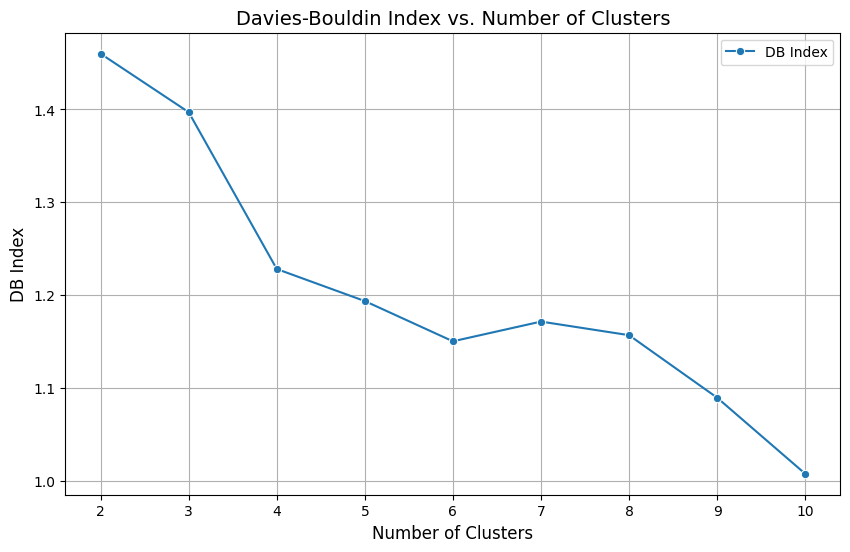

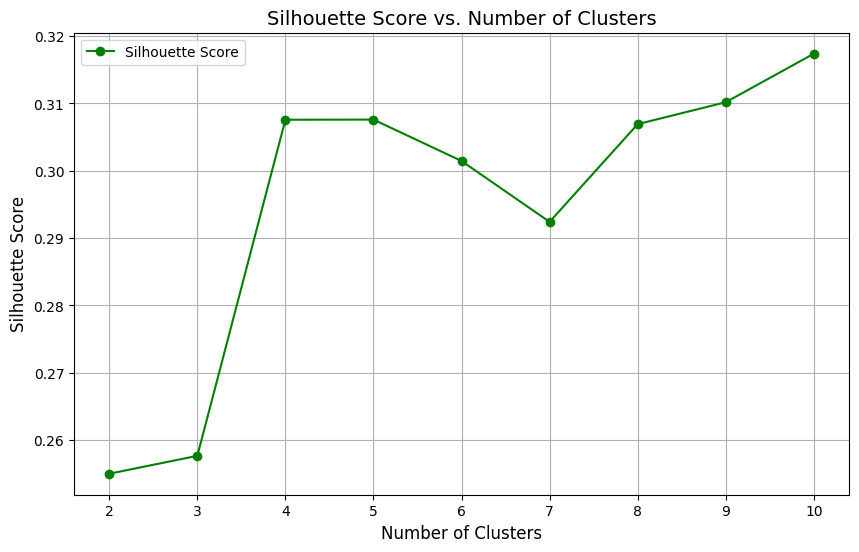

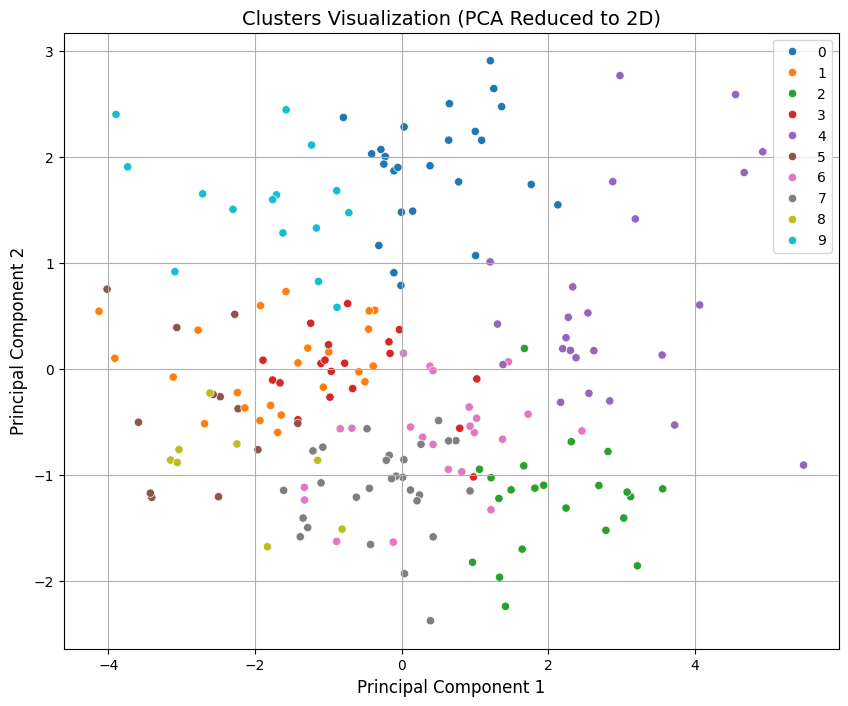

Optimal Number of Clusters: 10
Davies-Bouldin Index for Optimal Clusters: 1.0078


In [9]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Scores
silhouette_scores = []
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, labels))

# Plot DB Index
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(clusters_range), y=db_indices, marker='o', label="DB Index")
plt.title("Davies-Bouldin Index vs. Number of Clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("DB Index", fontsize=12)
plt.xticks(clusters_range)
plt.legend()
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(list(clusters_range), silhouette_scores, marker='o', label="Silhouette Score", color='green')
plt.title("Silhouette Score vs. Number of Clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

# Plot Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette="tab10", legend="full")
plt.title("Clusters Visualization (PCA Reduced to 2D)", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid(True)
plt.show()

# Print Optimal Clusters and DB Index
print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"Davies-Bouldin Index for Optimal Clusters: {optimal_result['db_index']:.4f}")


In [12]:
from fpdf import FPDF
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create a PDF class
class PDFReport(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Clustering Analysis Report', border=0, ln=1, align='C')
        self.ln(10)

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}', align='C')

    def add_section(self, title, content):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, ln=1)
        self.ln(5)
        self.set_font('Arial', '', 10)
        self.multi_cell(0, 10, content)
        self.ln(10)

    def add_image(self, img_path, x=10, y=None, w=190):
        if os.path.exists(img_path):
            self.image(img_path, x=x, y=y, w=w)
            self.ln(85)  # Adjust based on image size

# Save plots as images
# Plot DB Index
db_index_plot_path = "db_index_plot.png"
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(clusters_range), y=db_indices, marker='o', label="DB Index")
plt.title("Davies-Bouldin Index vs. Number of Clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("DB Index", fontsize=12)
plt.xticks(clusters_range)
plt.legend()
plt.grid(True)
plt.savefig(db_index_plot_path)
plt.close()

# Plot Silhouette Scores
silhouette_score_plot_path = "silhouette_score_plot.png"
plt.figure(figsize=(10, 6))
plt.plot(list(clusters_range), silhouette_scores, marker='o', label="Silhouette Score", color='green')
plt.title("Silhouette Score vs. Number of Clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig(silhouette_score_plot_path)
plt.close()

# PCA Visualization
pca_plot_path = "pca_clusters_plot.png"
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette="tab10", legend="full")
plt.title("Clusters Visualization (PCA Reduced to 2D)", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid(True)
plt.savefig(pca_plot_path)
plt.close()

# Generate PDF
pdf = PDFReport()
pdf.add_page()

# Add sections to the PDF
pdf.add_section("Overview", "This report provides an analysis of customer segmentation using clustering techniques. "
                            "Key metrics such as Davies-Bouldin Index and Silhouette Score were calculated to evaluate the clustering quality.")

pdf.add_section("Clustering Metrics", f"Optimal Number of Clusters: {optimal_clusters}\n"
                                      f"Davies-Bouldin Index for Optimal Clusters: {optimal_result['db_index']:.4f}")

# Add plots to the PDF
pdf.add_section("Visualizations", "The following visualizations provide insights into the clustering results:")
pdf.add_image(db_index_plot_path)
pdf.add_image(silhouette_score_plot_path)
pdf.add_image(pca_plot_path)

# Save the PDF
output_pdf_path = "Harshitha N Clustering.pdf"
pdf.output(output_pdf_path)

print(f"PDF report generated: {output_pdf_path}")


PDF report generated: Harshitha N Clustering.pdf
